# Quant Bio Project #2

## Setup

In [52]:
import pandas as pd
import numpy as np
import csv
import sys

from ipywidgets import FloatProgress
from IPython.display import display

## Reading in the Data

In [53]:
bin_mat = pd.read_csv('BinMat.csv', header=None)
eval_mat = pd.read_csv('EvalMat.csv', header=None)

In [54]:
# Matlab split each character in the gene names and ids into a separate column,
# so rather than try to deal with Matlab I am just going to read the
# file as is and then put the gene name back together
with open('gid_columns.csv') as f:
    reader = csv.reader(f)
    raw_gene_ids = list(reader)

gene_ids = []
for gene in raw_gene_ids:
    gene_ids.append(''.join(gene))
    
with open('gene_names.csv') as f:
    reader = csv.reader(f)
    raw_gene_names = list(reader)

gene_names = []
for gene in raw_gene_names:
    gene_names.append(''.join(gene))

In [55]:
# Same thing for the species names
with open('species_rows.csv') as f:
    reader = csv.reader(f)
    raw_species_rows = list(reader)
    
species_rows = []
for species in raw_species_rows:
    species_rows.append(''.join(species))

In [56]:
# Now we put the gene and species info with our
# gene presence/absence data
bin_mat.columns = gene_ids
#bin_mat['species'] = pd.Series(species_rows, index=bin_mat.index)

eval_mat.columns = gene_ids
#eval_mat['species'] = pd.Series(species_rows, index=eval_mat.index)

## Processing the Data

In [57]:
# This function will compute the sum of the pairwise differences between two lists
def pairwise_difference(list1, list2):
    a = np.array(list1).astype(int)
    b = np.array(list2).astype(int)
    c = np.subtract(a, b)
    diff = np.sum(np.abs(c))
    return diff

In [58]:
# Here we calculate all the species pairwise differences
l = len(bin_mat.index)
diffs = [[0 for x in range(l)] for y in range(l)]

f = FloatProgress(min=0, max=l-1)
display(f)

g = FloatProgress(min=0, max=100)
display(g)

for i in range(0, l):
    sys.stdout.write('\rProcessing '+str(i+1)+' of '+str(l))
    for j in range(i, l):
        row1 = list(bin_mat.iloc[i])
        row2 = list(bin_mat.iloc[j])
        diff = pairwise_difference(row1, row2)
        diffs[i][j] = diff
        diffs[j][i] = diff
        g.value = (j-i)/float((l-i)) * 100
    f.value = i
        

FloatProgress(value=0.0, max=2602.0)

FloatProgress(value=0.0)

Processing 2603 of 2603

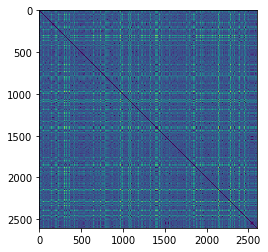

In [59]:
import matplotlib.pyplot as plt

plt.imshow(diffs)
plt.show()


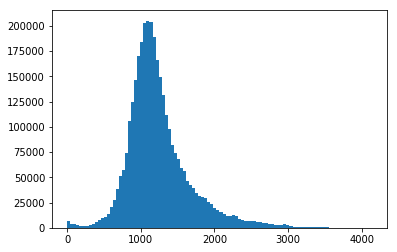

In [60]:
outfile = open('diffs.csv', 'w')
values = []
for i in range(0, l):
    for j in range(i, l):
        values.append(diffs[i][j])
        outfile.write(str(diffs[i][j]))
        outfile.write('\n')
outfile.close()
        
plt.hist(values, bins=100)
plt.show()